In [40]:
import os
from os import listdir
from os.path import isfile, join
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pylab import cm
import mpltex
import itertools
from matplotlib import pyplot
from scipy import stats

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

mypath = os.getcwd()
folder_lst = [f for f in listdir(mypath) if not isfile(join(mypath, f))]


In [41]:
json_lst = {}
for folder in folder_lst:
    json_lst[folder] = {}
    readme = os.path.join(mypath, folder, 'readme.txt')
    json_lst[folder]['pickle'] = os.path.join(mypath, folder, 'result_0.30000000000000004_1.pkl')
    with open(readme) as f:
        lines = f.readlines()
        for line in lines: 
            parsed_line = re.split(': ', line[:-2])
            key = parsed_line[0]
            value = parsed_line[1]
            if 'state threshold' == key or 'exploit threshold' == key:
                value = float(value)
            elif 'exploit percentage drop' == key:
                value = float(value[1:-1])
            elif 'time_lst' == key:
                value = np.array([float(t) for t in re.split(', ', value[1:-1])])
            json_lst[folder][key] = value


In [42]:
policies = ["No Investigation", "MinFP",   "Bayes", "MaxEntropy","All"]
summary_keys = ['mean','std']
summary_json = {}
for folder in folder_lst:
    summary_json[json_lst[folder]['state threshold']] = {}
    for p in policies:
        summary_json[json_lst[folder]['state threshold']][p] = {}
        for key in summary_keys:
            summary_json[json_lst[folder]['state threshold']][p][key] = {}
    summary_json[json_lst[folder]['state threshold']]['time_lst'] = json_lst[folder]['time_lst']

for folder in folder_lst:
    file = open(json_lst[folder]['pickle'],'rb')
    object_file = pickle.load(file)
    file.close()
    temp = {}
    mse_key = ['MSE']
    for k in mse_key: 
        v = object_file[k]
        temp[k] ={}
        for k2,v2 in v.items():
            if k2.split('_')[0] == "LowFP":
                temp[k]['MinFP_'+ k2.split('_')[1]] = v2
            elif k2.split('_')[0] == "No investigation":
                temp[k]['No Investigation_'+ k2.split('_')[1]] = v2
            else:
                temp[k][k2] = v2
    object_file = temp

    save_dict = {}
    policies_list = []
    metrics_list = []
    omega_list = []
    for metric, v in object_file.items():
        for k2, v2 in v.items():
            policy = k2.split('_')[0] 
            omega = k2.split('_')[1]
            omega_list.append(omega)
            save_dict[omega] = {}
    for metric, v in object_file.items():
        metrics_list.append(metric)
        for k,v in save_dict.items():
            save_dict[k][metric] = {}

    for metric, v in object_file.items():
        for k2, v2 in v.items():
            policy = k2.split('_')[0] 
            if policy not in policies_list:
                policies_list.append(policy)
            omega = k2.split('_')[1]
            try:
                save_dict[omega][metric][policy] = v2
            except:
                save_dict[omega][metric] = {}
                save_dict[omega][metric][policy] = v2
    # policies_list = np.unique(policies_list)
    omega_list = set(omega_list)

    # fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))

    locs = ["upper left", "upper right"]
    for metric, metric_dict in save_dict[list(save_dict.keys())[-1]].items():
        linestyles = mpltex.linestyle_generator(colors=[],
                                            lines=['-',':'],
                                            markers=['o','^', 'x', 's'],
                                            hollow_styles=[False, True],)
        for policy in policies:
            rollouts = save_dict[list(save_dict.keys())[-1]][metric][policy]
            summary_json[json_lst[folder]['state threshold']][policy]['mean'] = rollouts.mean(axis=0)
            summary_json[json_lst[folder]['state threshold']][policy]['std'] = rollouts.std(axis=0)
    #         ax.plot(rollouts.mean(axis=0), 
    #                     lw=2,
    #                     label=f'{policy}', 
    #                     **next(linestyles),
    #                     markevery=5
    #                     )
    #         ax.set_title('')
    #     # ax.legend(loc=locs)
    #     ax.set_ylim([0, 1])
    #     ax.set_xlabel('Step (t)', labelpad=10)
    #     ax.set_ylabel('MSE', labelpad=10)
    # fig.savefig('time_vs_mse.eps', format='eps', bbox_inches='tight')
    # plt.show()


In [43]:
last_mean_dict = {}
last_std_dict = {}
for p in policies:
    last_mean_dict[p] = []
    last_std_dict[p] = []

state_drop_rates = np.array(list(summary_json.keys()))
for r in state_drop_rates:
    for p in policies:
        last_mean_dict[p].append(summary_json[r][p]['mean'][-1])
        last_std_dict[p].append(summary_json[r][p]['std'][-1])
sorted_idx = np.array(state_drop_rates).argsort()
state_drop_rates[sorted_idx]

array([0.  , 0.01, 0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(-56.050208496304776, 24651.591660696242)


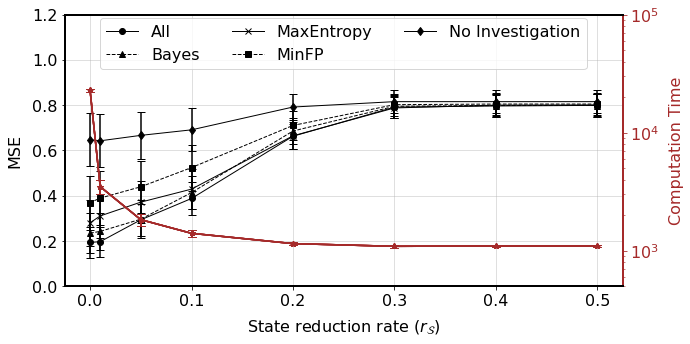

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
policies = sorted(policies)
i = 0
locs = ["upper left", "upper right"]
lll = ['-', '--']
mmm = ['o','^', 'x', 's', 'd', '+']
ccc = ['black', 'brown']
cc = itertools.cycle(ccc)
ll = itertools.cycle(lll)
mm = itertools.cycle(mmm)

time_lst_array = []
for key in state_drop_rates[sorted_idx]:
    time_lst_array.append(summary_json[key]['time_lst'])
time_lst_array = np.array(time_lst_array)

for metric, metric_dict in save_dict[list(save_dict.keys())[-1]].items():
    linestyles = mpltex.linestyle_generator(colors=[],
                                        lines=['-',':'],
                                        markers=['o','^', 'x', 's'],
                                        hollow_styles=[False, True],)
    for policy in policies:
        if policy != "Random":
            m = next(mm)
            l = next(ll)
            ax.plot(state_drop_rates[sorted_idx], 
                    np.array(last_mean_dict[policy])[sorted_idx], 
                        l,
                        lw=1,
                        label=f'{policy}', 
                            marker= m,
                        color='black'
                        # markevery=5
                        )
            mean = np.array(last_mean_dict[policy])[sorted_idx]
            std = np.array(last_std_dict[policy])[sorted_idx]
            n= 32
            yerr = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
            bar1 = ax.errorbar(state_drop_rates[sorted_idx], 
                                y=mean, 
                                linestyle='', 
                                yerr=yerr,                         
                                # label=f'{policy}', 
                                marker='', 
                                color='k', 
                                # markevery=10, 
                                capsize=4
                                )
            ax2.plot(state_drop_rates[sorted_idx], 
                    time_lst_array.mean(axis=-1), 
                        color='brown', 
                        marker='*', 
                        # markevery=5
                        )
            mean2 = time_lst_array.mean(axis=-1)
            std2 = time_lst_array.std(axis=-1)
            yerr2 = std2 / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
            bar2 = ax2.errorbar(state_drop_rates[sorted_idx], 
                                y=mean2, 
                                linestyle='', 
                                yerr=yerr2,                         
                                # label=f'{policy}', 
                                marker='', 
                                color='brown', 
                                # markevery=10, 
                                capsize=4
                                )
            ax.set_title('')
    ax.legend(loc=(0.063,0.8), ncol=3)
    ax.set_xlabel(r'State reduction rate ($r_{\mathcal{S}}$)', labelpad=10)
ax.set_ylim([0,1.2])
print(ax2.get_ylim())
ax2.set_ylim([500,100000])
ax.set_ylabel('MSE', labelpad=10)
ax2.set_ylabel('Computation Time', labelpad=10)
ax2.set_yscale('log')
ax2.spines['right'].set_color('brown')
ax2.yaxis.label.set_color('brown')
ax2.tick_params(axis='y', which="major", colors='brown')
ax2.tick_params(axis='y', which="minor", colors='brown')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
fig.savefig('state_reduction.eps', format='eps', bbox_inches='tight')

plt.show()


In [45]:
yerr

array([0.11631219, 0.11700543, 0.1051362 , 0.09512149, 0.05604582,
       0.05032155, 0.05032155, 0.05032155])

In [46]:
mean

array([0.64818182, 0.64279934, 0.66680355, 0.69122349, 0.79189557,
       0.81569715, 0.81569715, 0.81569715])

In [47]:
policy_dict = {}
for policy_omega, rollouts in object_file['MSE'].items():
    try:
        policy_dict[policy_omega.split('_')[0]][policy_omega] = rollouts
    except:
        policy_dict[policy_omega.split('_')[0]] = {}
        policy_dict[policy_omega.split('_')[0]][policy_omega] = rollouts

In [48]:
diff_omega_dict ={}
for metric in metrics_list:
    diff_omega_dict[metric] = {}
    for policy in policies_list:
        diff_omega_dict[metric][policy] = []
mistakes = []
for omega in omega_list:
    try:
        mistakes.append(1 - float(omega))
    except:
        pass
mistakes = np.sort(mistakes)
for omega, metrics_dict in save_dict.items():
    try:
        for metric, policy_dict in metrics_dict.items():
            for policy, value in policy_dict.items():
                diff_omega_dict[metric][policy].append(np.concatenate([np.array([1 - float(omega)]), value[:,49]], axis = 0))#.mean())
    except:
        pass

for metric in diff_omega_dict.keys():
    for policy in diff_omega_dict[metric].keys():
        diff_omega_dict[metric][policy] = np.array(diff_omega_dict[metric][policy])


In [49]:
diff_omega_dict['MSE']['Bayes'].shape

(1, 101)

In [50]:
for metric, metric_dict in diff_omega_dict.items():
    for policy, policy_np in metric_dict.items():
        policy_np = np.array(policy_np)
        diff_omega_dict[metric][policy] = policy_np[policy_np[:, 0].argsort()]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


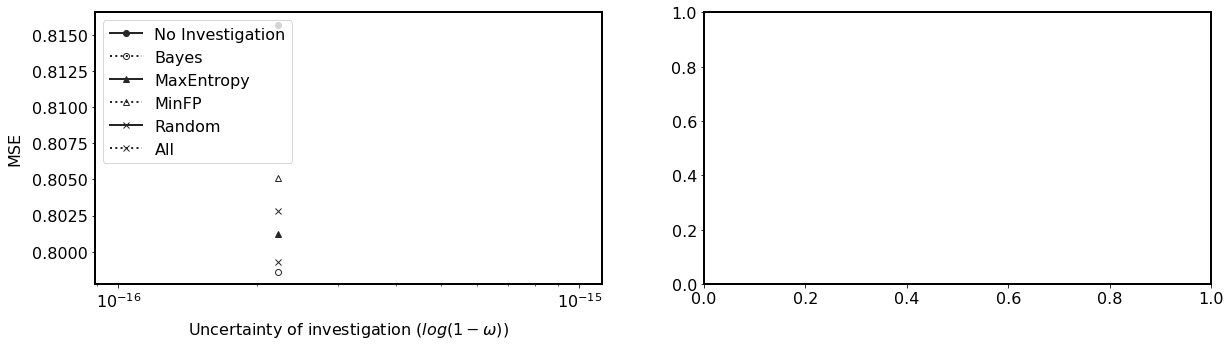

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(20,5))

i = 0

locs = ["upper left", "upper right"]
for metric, metric_dict in diff_omega_dict.items():
    for policy, val in metric_dict.items():
        ax[i].plot(val[:,0], 
                    val[:,1:].mean(axis=1), 
                    lw=2,
                    label=f'{policy}', 
                    **next(linestyles),
                    markevery=1
                    )
        ax[i].set_title('')
        ax[i].set_xscale('log')
        ax[i].legend(loc=locs[i])
        ax[i].set_xlabel('Uncertainty of investigation ($log(1-\omega)$)', labelpad=10)
        ax[i].set_ylabel('MSE', labelpad=10)
    if i == 0:
        ax[i].set_ylabel('MSE', labelpad=10)
    else:
        ax[i].set_ylabel('Entropy', labelpad=10)

    i += 1

fig.savefig('1-omega_vs_entropy.eps', format='eps', bbox_inches='tight')
plt.show()


In [52]:
list(save_dict.keys())

['0.9999999999999998']

In [53]:
omegas = [list(save_dict.keys())[-1], list(save_dict.keys())[2]]

IndexError: list index out of range

In [ ]:
subset_policy = policies
del subset_policy[-1]

In [ ]:
policies = ["No Investigation", "MinFP", "Random",  "Bayes", "MaxEntropy","All"]
policies = sorted(policies)

In [ ]:
policies

['All', 'Bayes', 'MaxEntropy', 'MinFP', 'No Investigation', 'Random']

All
Bayes
MaxEntropy
MinFP
No Investigation
Random
All
Bayes
MaxEntropy
MinFP
No Investigation
Random


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


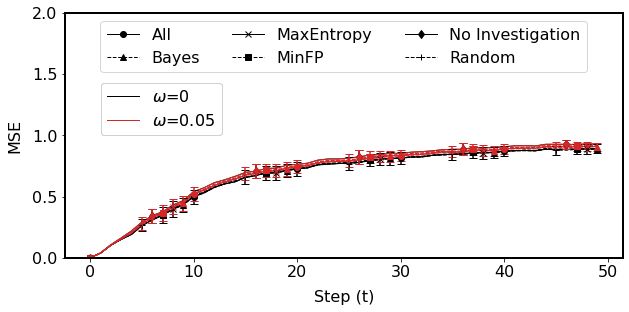

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,4.5))

i = 0
locs = ["upper center", "upper right"]
lll = ['-', '--']
mmm = ['o','^', 'x', 's', 'd', '+']
ccc = ['black', 'tab:red']
cc = itertools.cycle(ccc)
ll = itertools.cycle(lll)
mm = itertools.cycle(mmm)

for omega in omegas:
    c = next(cc)
    for policy in sorted(policies):
        if policy != '':
            # print(policy)
            m = next(mm)
            l = next(ll)
            
            rollouts = save_dict[omega]['MSE'][policy]

            ax.plot(rollouts.mean(axis=0)[:50], 
                        l,
                        lw=1,
                        label=f'{policy}', 
                        marker= m,
                        color= c,
                        markevery=100
                        )
            ax.set_title('')
    # ax.legend(loc=locs[i], ncol=3)
    ax.set_xlabel('Step (t)', labelpad=10)
    ax.set_ylabel('MSE', labelpad=10)
    ax.set_ylim([0, 2])

    i += 1

lines = ax.get_lines()
legend1 = pyplot.legend([lines[i] for i in [0,1,2,3,4,5]], policies, ncol = 3, loc="upper center")
ax.add_artist(legend1)
for l in lines:
    l.set_marker('')
legend2 = pyplot.legend([lines[i] for i in [0,6] ], ["$\omega$=0", "$\omega$=0.05"], loc=(0.065,0.5))
ax.add_artist(legend2)
for i, line in enumerate(lines):
    m = next(mm)
    line.set_marker(m)

for omega in omegas:
    cnt = 0
    c = next(cc)
    for policy in sorted(policies):
        if policy != '':
            print(policy)
            m = next(mm)
            l = next(ll)
            
            rollouts = save_dict[omega]['MSE'][policy]
            
            mean = rollouts.mean(axis = 0)
            std = rollouts.std(axis = 0)
            n= rollouts.shape[0]
            yerr = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)

            for i in range(mean.shape[0]):
                
                if (i+cnt)%(10) == 0:
                    bar1 = plt.errorbar(i, 
                                        y=mean[i], 
                                        # linestyle=':', 
                                        yerr=yerr[i],                         
                                        # label=f'{policy}', 
                                        marker=m, 
                                        color=c, 
                                        # markevery=10, 
                                        capsize=4
                                        )
            cnt += 1
fig.savefig('time_vs_mse.eps', format='eps', bbox_inches='tight')
plt.show()


In [ ]:
temp = diff_omega_dict['MSE']['No Investigation'][0,:].copy()
temp[0] = 0.5

In [ ]:
for k, np_array in diff_omega_dict['MSE'].items():
    diff_omega_dict['MSE'][k] = np.concatenate([temp.reshape(1,-1), np_array], axis=0)

In [ ]:
for k, np_array in diff_omega_dict['MSE'].items():
    diff_omega_dict['MSE'][k] = np_array[np.argsort(np_array[:,0])]
    

[0.e+00 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 5.e-02 1.e-01 5.e-01 5.e-01]
[0.e+00 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 5.e-02 1.e-01 5.e-01 5.e-01]
[0.e+00 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 5.e-02 1.e-01 5.e-01 5.e-01]
[0.e+00 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 5.e-02 1.e-01 5.e-01 5.e-01]
[0.e+00 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 5.e-02 1.e-01 5.e-01 5.e-01]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


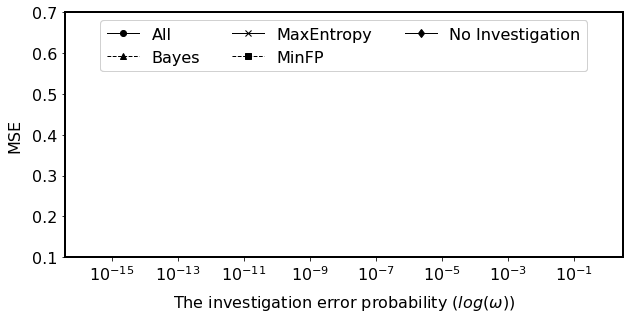

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,4.5))

i = 0

locs = ["upper center", "upper right"]
l = ['-', '--']
m = ['o','^', 'x', 's', 'd', '+']
c = ['black', 'brown']
cc = itertools.cycle(c)
ll = itertools.cycle(l)
mm = itertools.cycle(m)
for metric, metric_dict in diff_omega_dict.items():
    for policy in policies:
        if policy != 'Random':
            m = next(mm)    
            l = next(ll)
            val = diff_omega_dict[metric][policy]
            ax.plot(val[:,0], 
                    val[:,1:].mean(axis=1), 
                    l,
                    lw=1,
                    label=f'{policy}', 
                    marker = m,
                    color = 'black',
                    markevery=1
                    )
            ax.set_title('')
            ax.set_xscale('log')
            ax.legend(loc=locs[i], ncol=3)
            ax.set_xlabel('The investigation error probability ($log(\omega)$)', labelpad=10)

            

    if i == 0:
        ax.set_ylabel('MSE', labelpad=10)
        ax.set_ylim([0.1, 0.7])
    else:
        ax.set_ylabel('Entropy', labelpad=10)

    i += 1

lines = ax.get_lines()
legend1 = pyplot.legend([lines[i] for i in [0,1,2,3,4]], subset_policy, ncol = 3, loc="upper center")
ax.add_artist(legend1)

up_marker = ['_', "1"]
down_marker = ['_', "2"]
up = itertools.cycle(up_marker)
down = itertools.cycle(down_marker)
for metric, metric_dict in diff_omega_dict.items():
    for policy in policies:
        if policy != 'Random':
            u = next(up)    
            d = next(down)
            val = diff_omega_dict[metric][policy]
            mean = val[:,1:].mean(axis=1)
            std = val.std(axis = 1)
            n= val.shape[1]
            yerr = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
            x = val[:,0]
            x[0] = 0
            print(x)
            bar1 = plt.errorbar(x, 
                                y=mean, 
                                linestyle='', 
                                yerr=yerr,                         
                                # label=f'{policy}', 
                                # marker=m, 
                                color='black', 
                                # markevery=10, 
                                capsize=0
                                )
            
            plt.plot(x,mean+yerr, marker=u, ls="", color="black", ms=10)
            plt.plot(x,mean-yerr, marker=d, ls="", color="black", ms=10)
fig.savefig('1-omega_vs_mse.eps', format='eps', bbox_inches='tight')
plt.show()


In [ ]:
len(ax.get_lines())

20

Text(0.5, 0, 'Uncertainty of investigation ($\\omega$)')

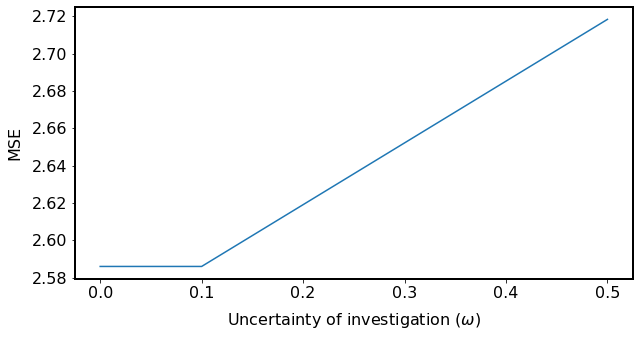

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))

ax.plot(diff_omega_dict['MSE']['All'][:,0], 
            np.exp(diff_omega_dict['MSE']['All'][:,1])
            )
ax.set_ylabel('MSE', labelpad=10)
ax.set_xlabel('Uncertainty of investigation ($\omega$)', labelpad=10)


In [ ]:
diff_omega_dict['MSE']['All'][:,0][1:-3]

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 5.e-02])

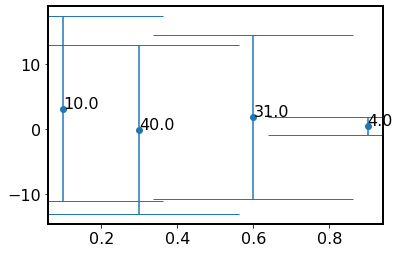

In [ ]:
import matplotlib.pyplot as plt
import numpy

df = numpy.array([[
    0.1, 0.3, 10, 3.13, 14.2], [
    0.3, 0.6, 40, -0.1, 12.98], [
    0.6, 0.9, 31, 1.8, 12.59], [
    0.9, 1.2, 4, 0.42, 1.42]])

bar1 = plt.errorbar(df[:, 0], y=df[:, 3], yerr=df[:, 4], marker='o', linestyle='', capsize=100)


xx = bar1.lines[0].get_xdata()
yy = bar1.lines[0].get_ydata()
for i in range(len(xx)):
    plt.text(x=xx[i], y=yy[i] + .1, s=str(df[:, 2][i]))
    i += 1
plt.show()
